# How to explore the 2019 Kaggle Survey data

**Step 1:** Click on the "Copy and Edit" button in the top right corner of this window.

**Step 2:** Run each cell individually or click on the "Run" => "Run All" button in the top-most menu.

**Step 3:** Click on the "Commit" button to publish a new version of your notebook.

**Step 4:** Adjust the "Sharing"/"Access" setting to change your notebook from private to public (and add citations if necessary).

**Step 5:** Explore additional analyses at https://www.kaggle.com/c/kaggle-survey-2019/notebooks.

**Step 6:** Tell a story using the data for the chance to win a [prize](https://www.kaggle.com/c/kaggle-survey-2019/overview/prizes)!


The code cell below was adapted from work that was originally authored by [@seshadrikolluri](https://www.kaggle.com/seshadrikolluri/kaggle-survey-all-histograms-in-10-lines-of-code).  We especially liked this work because @seshadrikolluri was able to produce a plot for every question using less than 15 lines of code.  Here we have adapted that work to apply to the 2019 Kaggle Survey data instead of the 2018 Kaggle Survey data.  https://www.kaggle.com/seshadrikolluri/kaggle-survey-all-histograms-in-10-lines-of-code

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



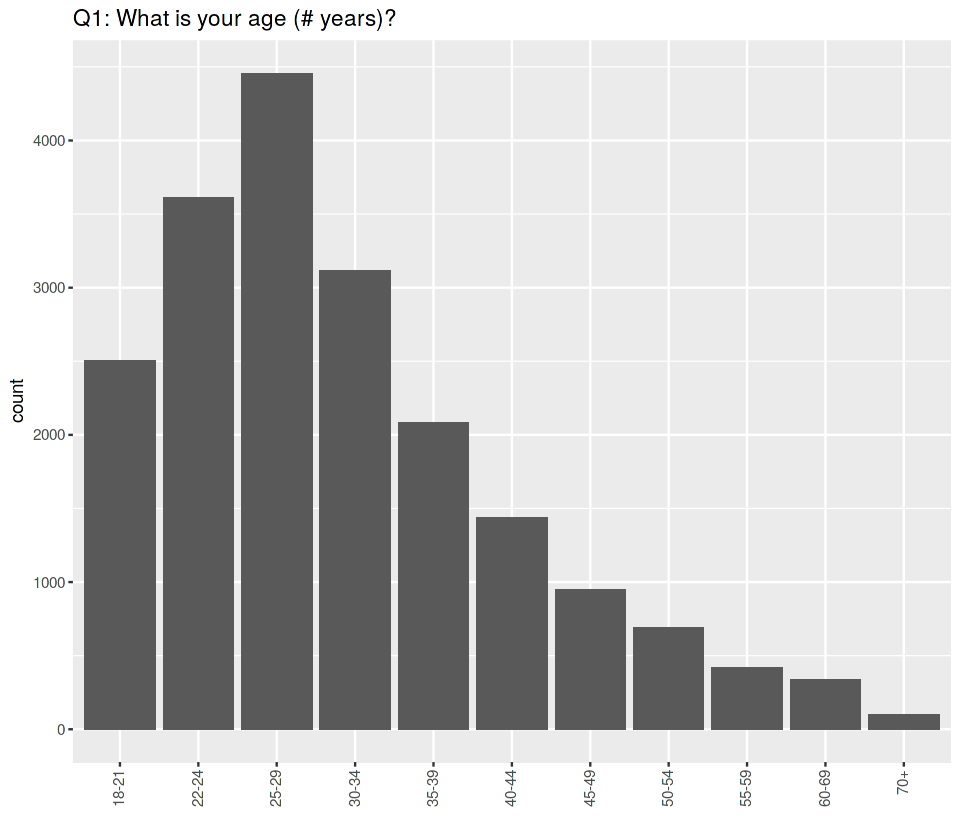

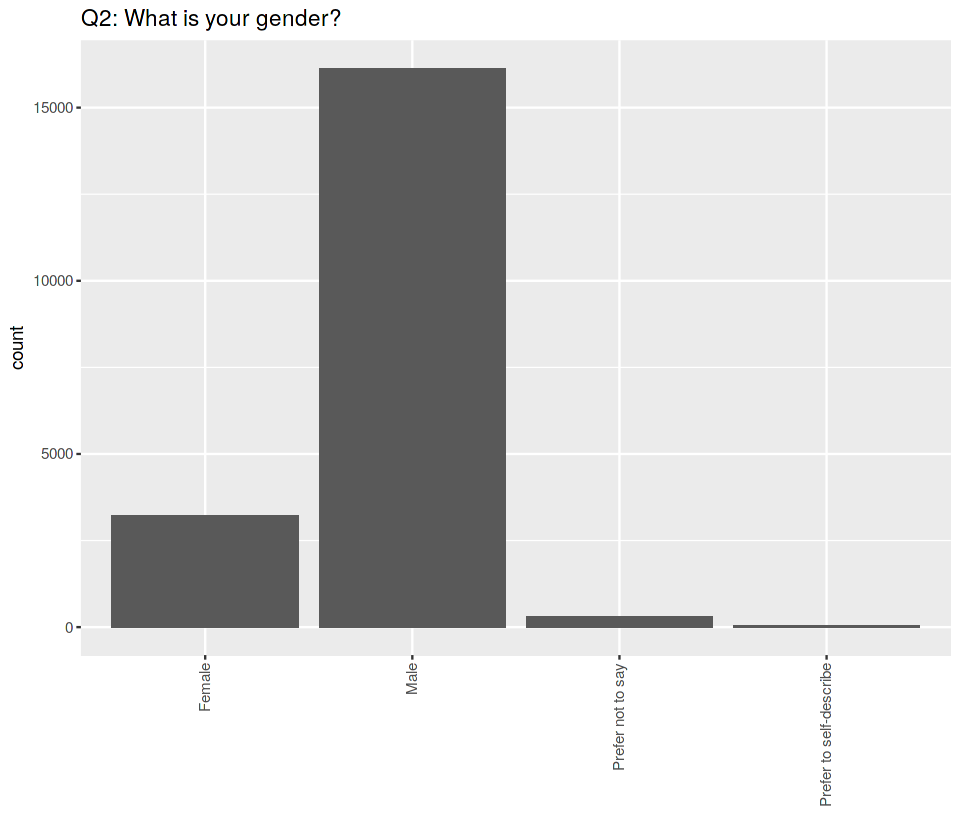

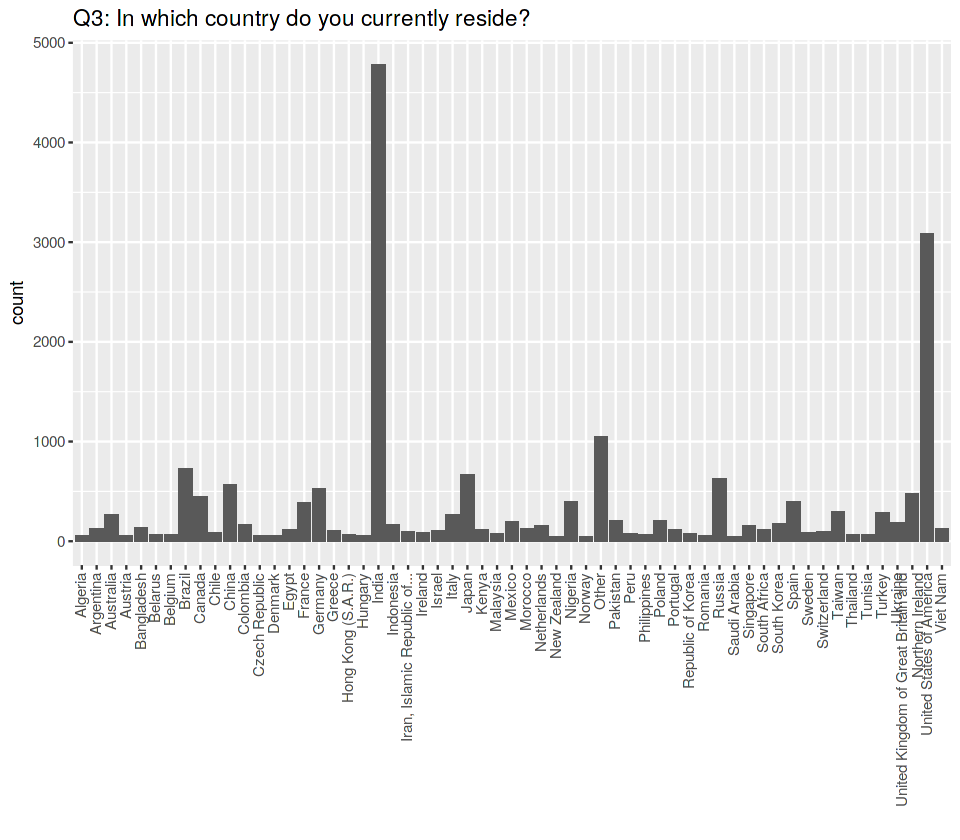

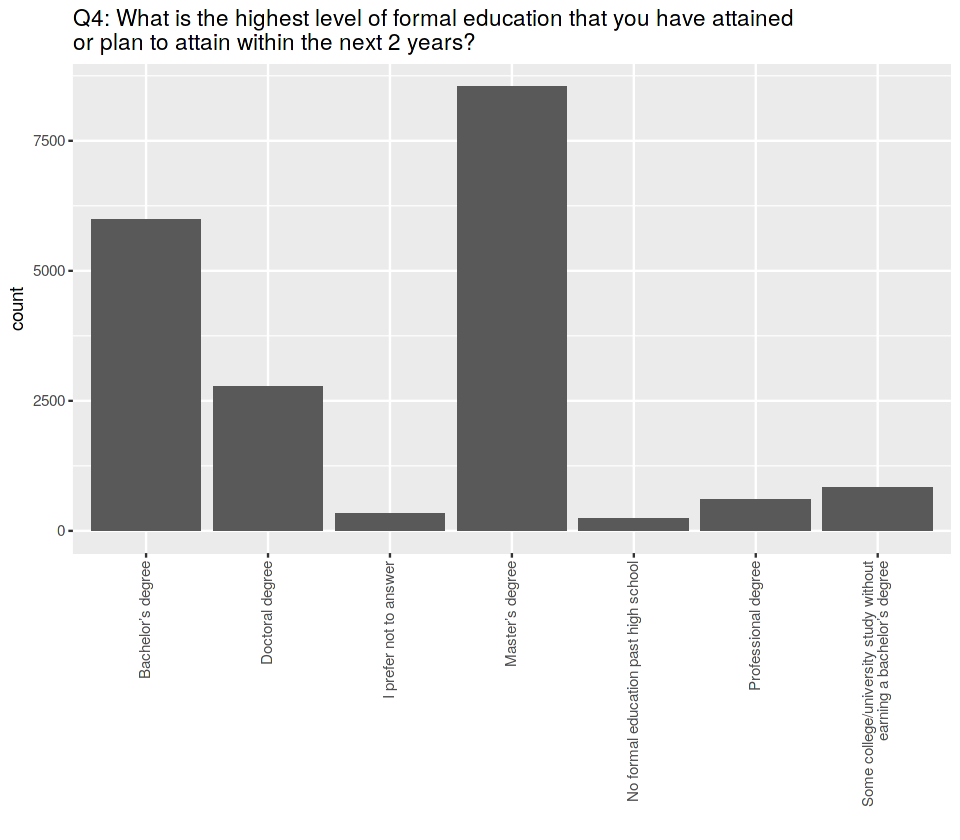

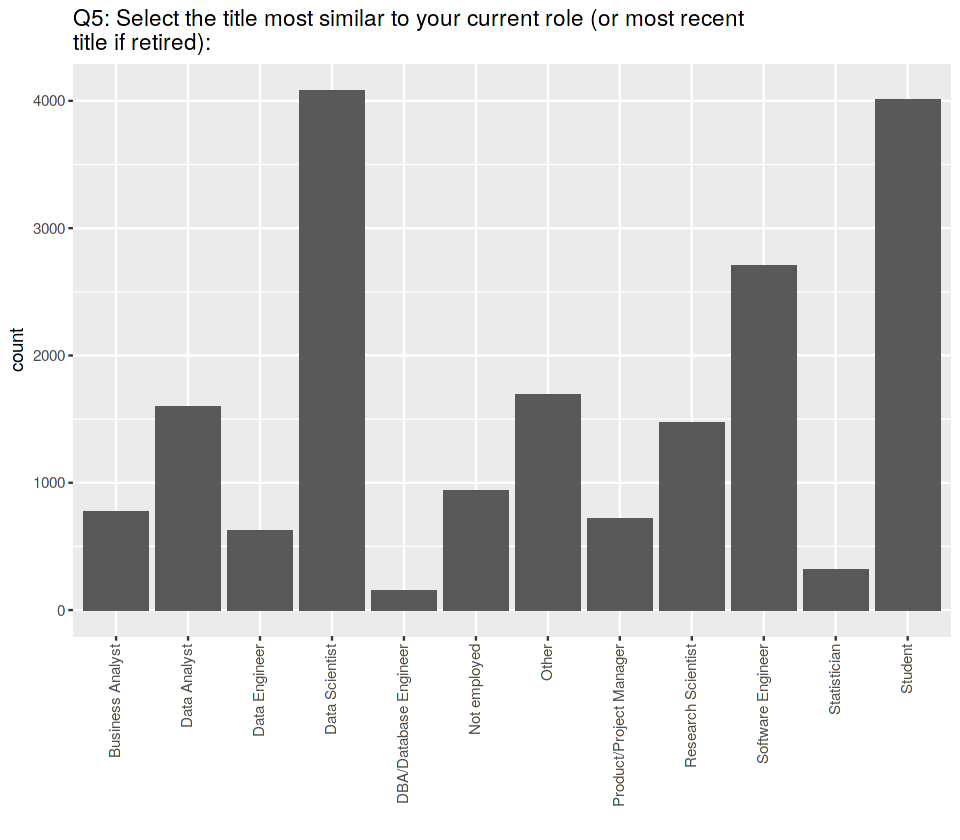

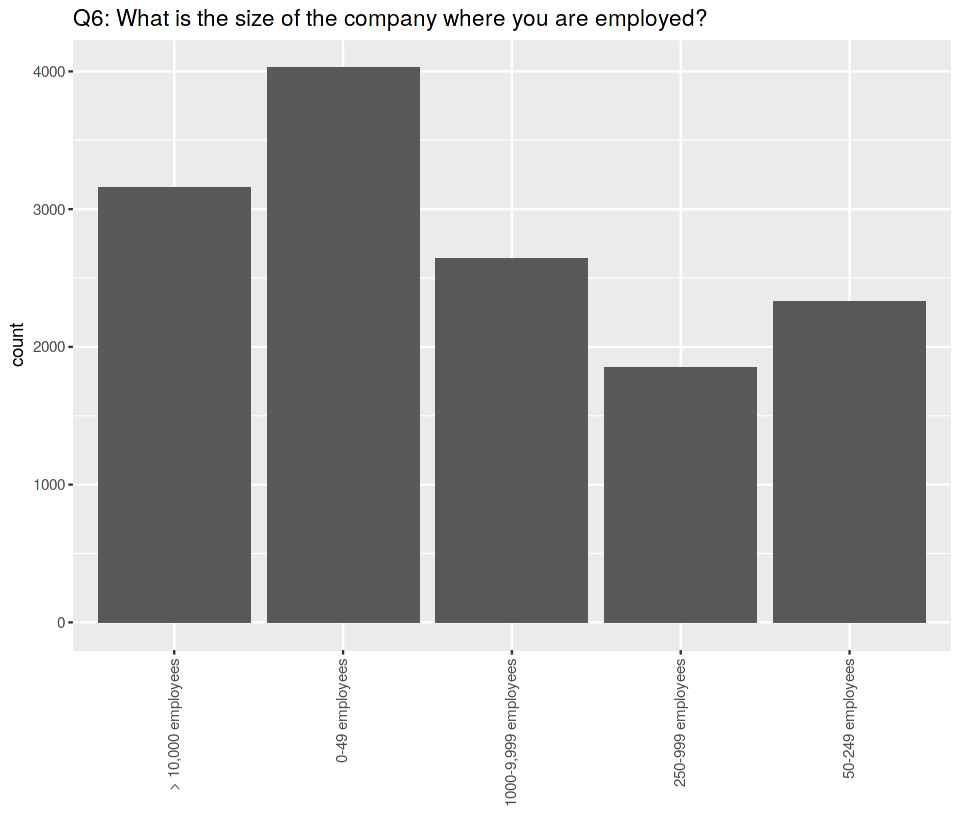

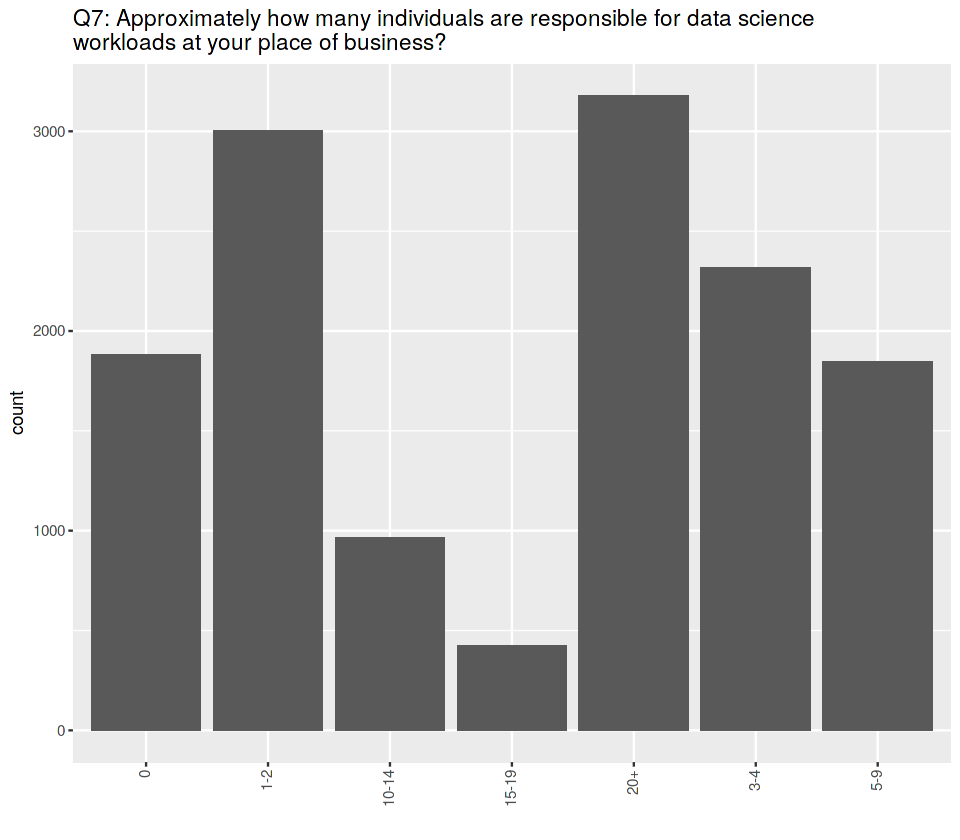

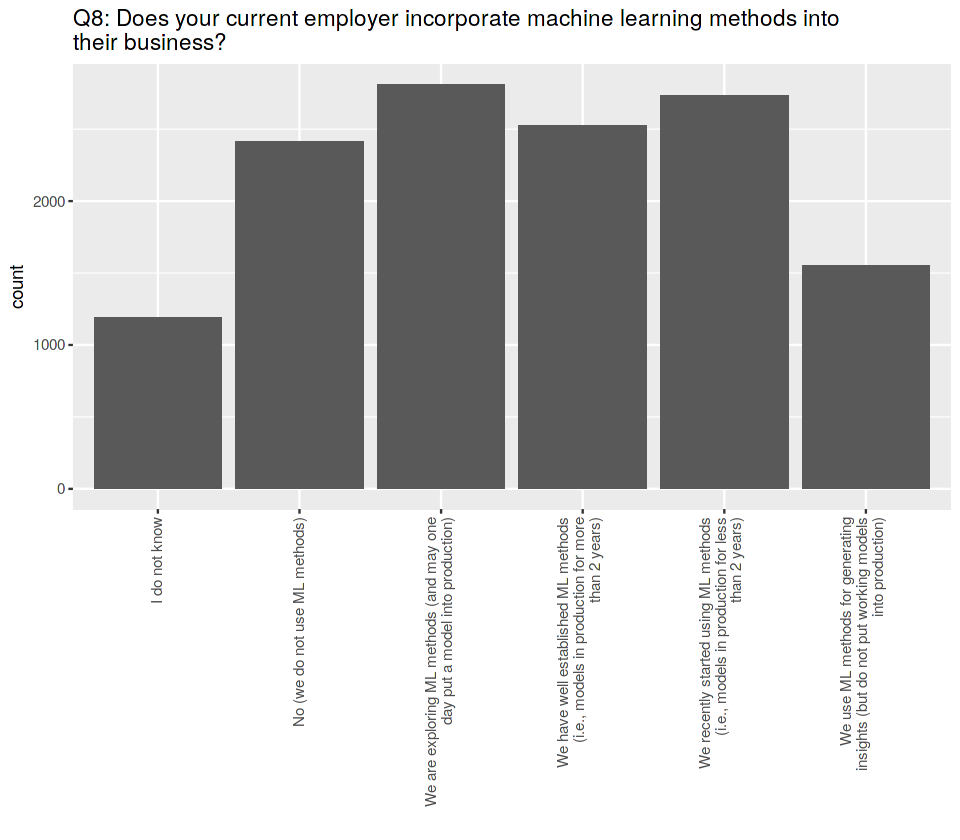

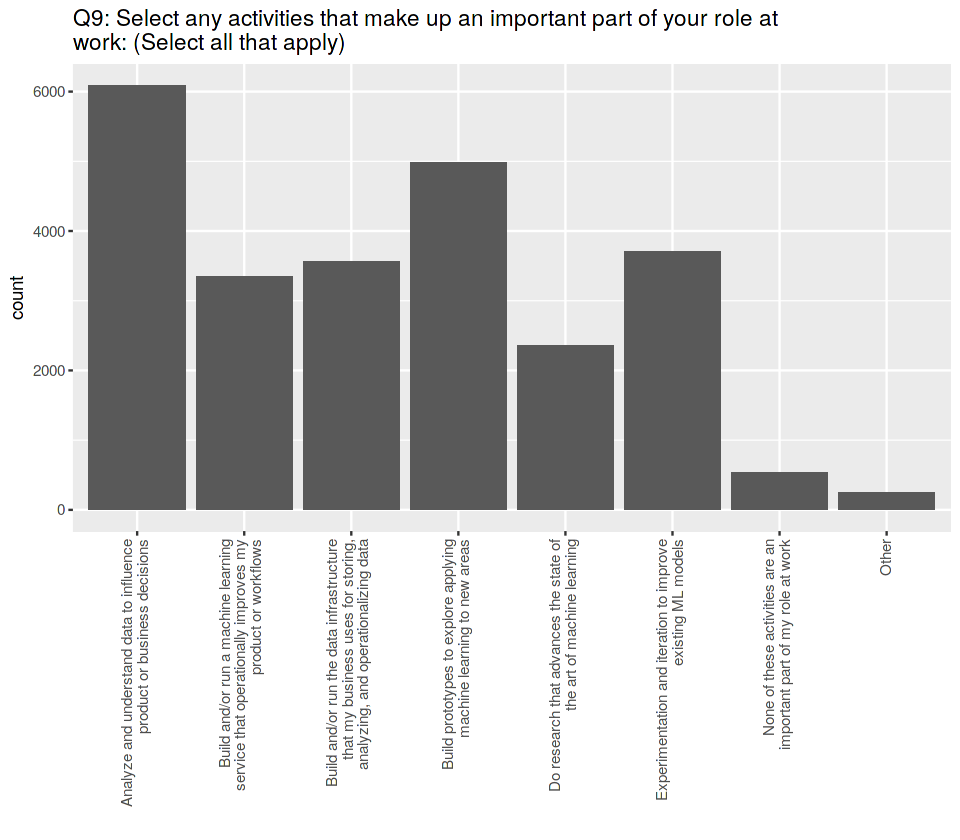

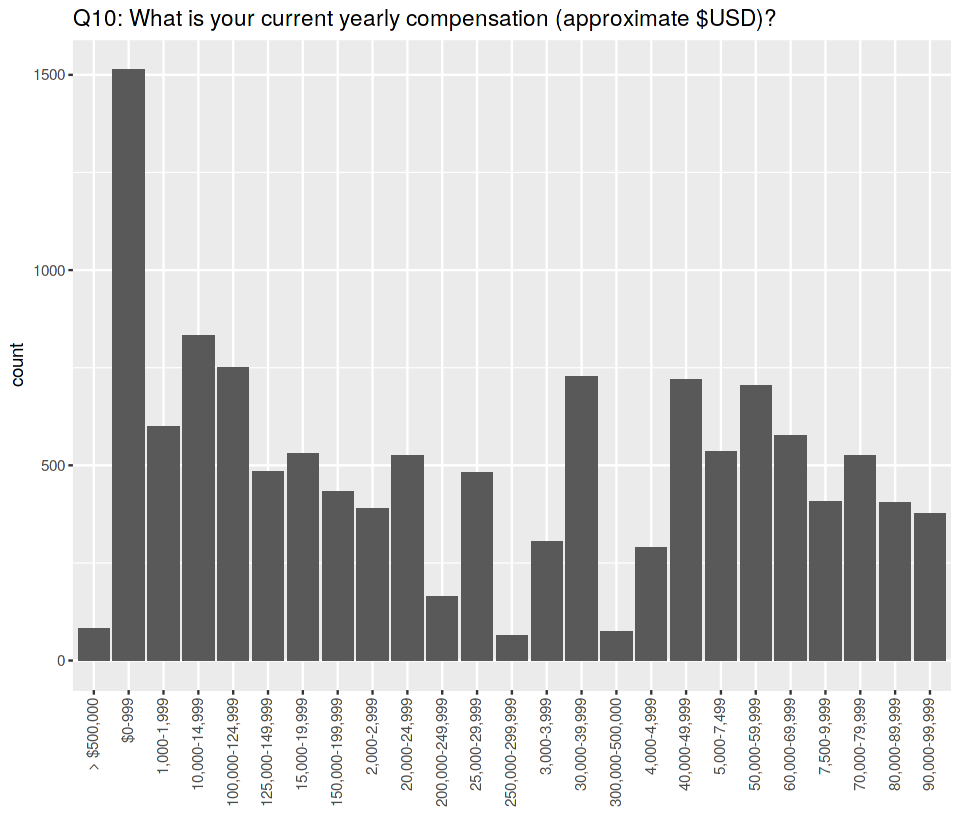

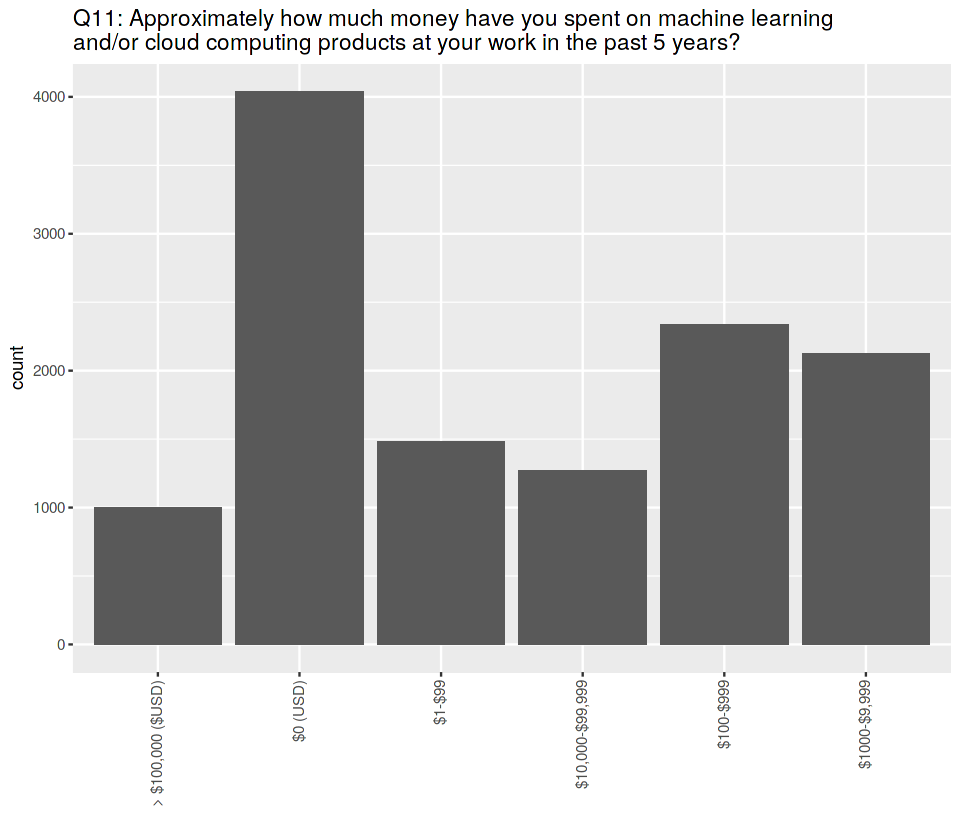

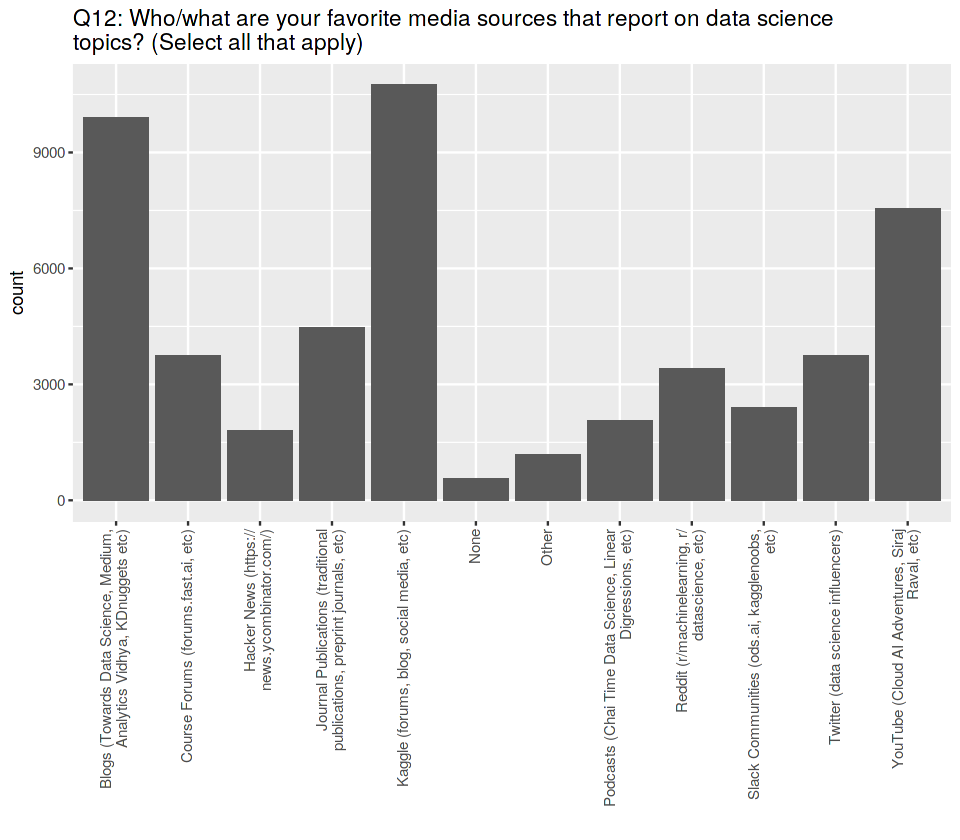

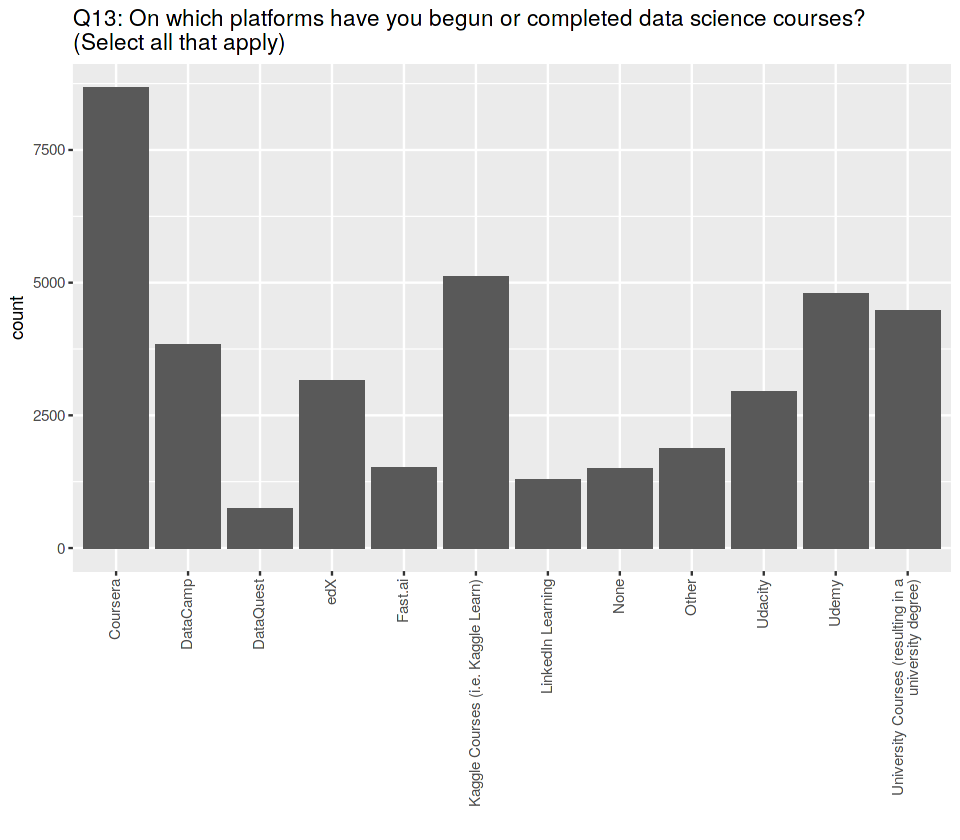

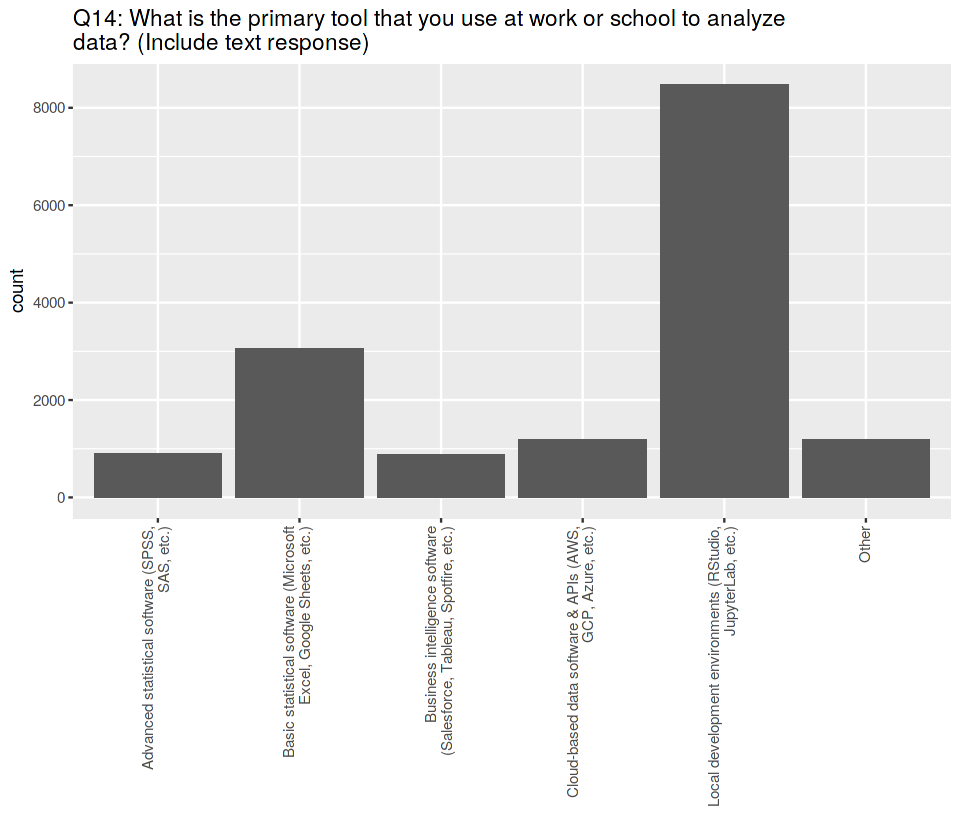

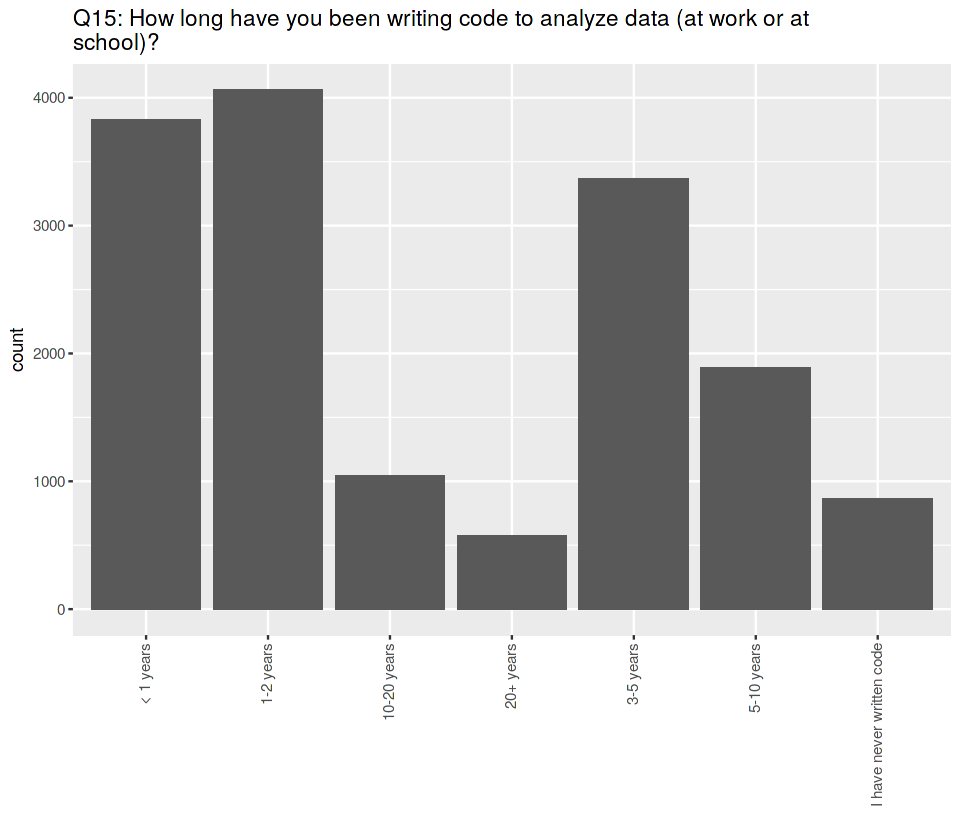

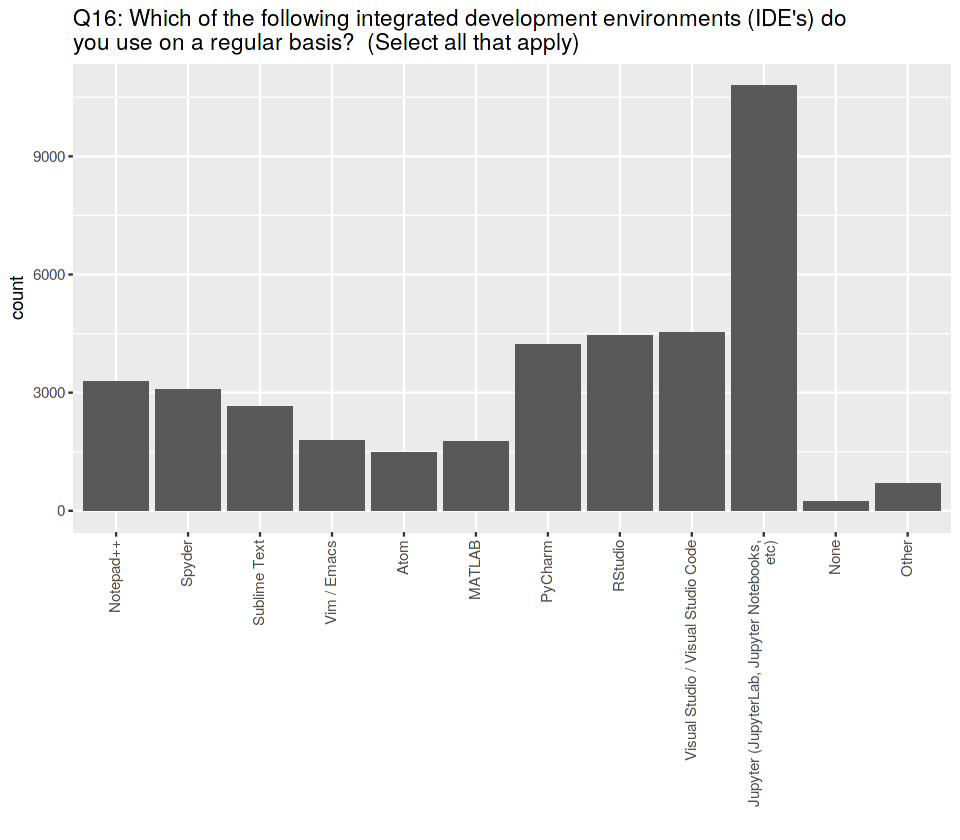

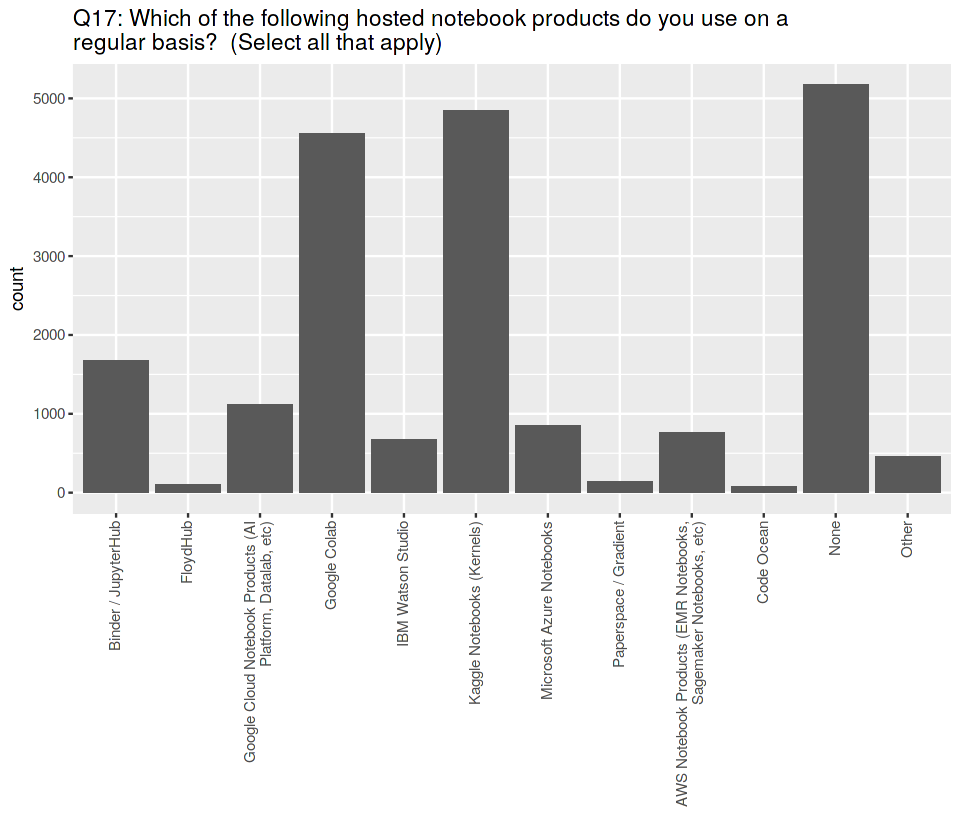

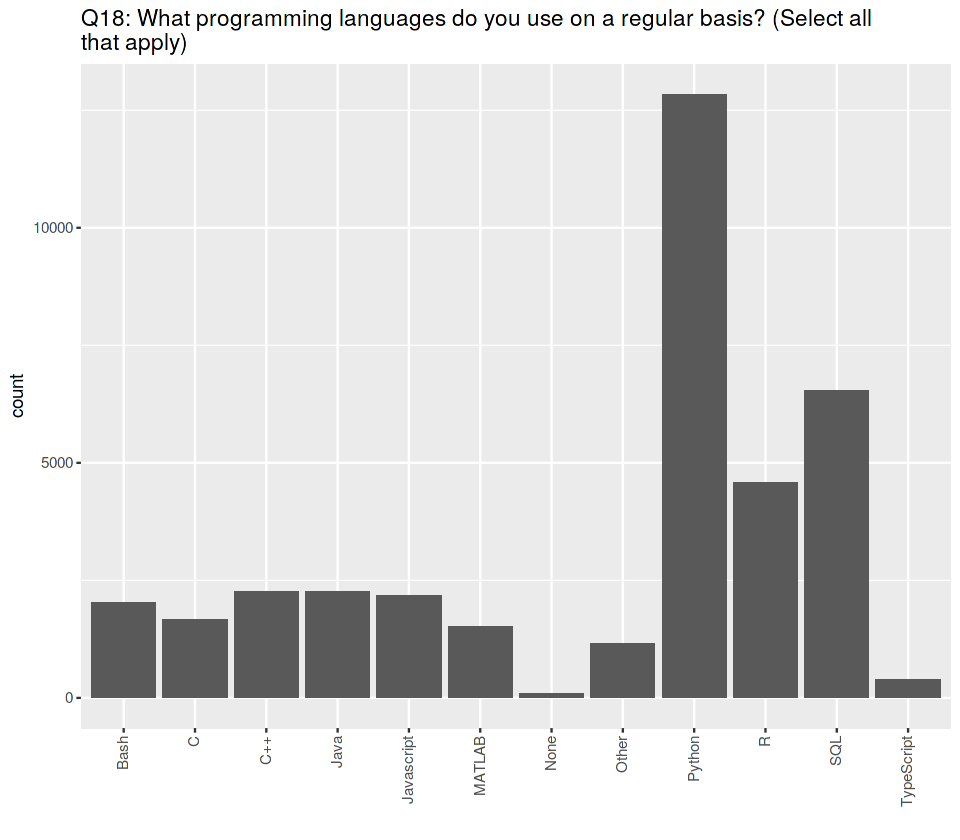

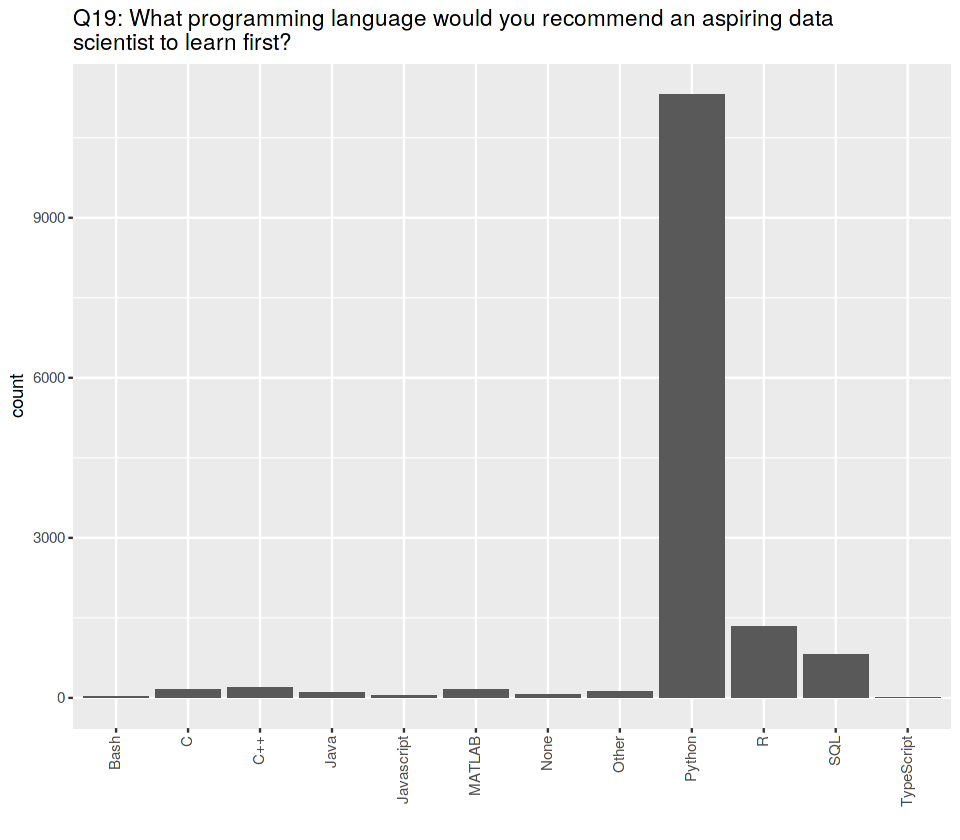

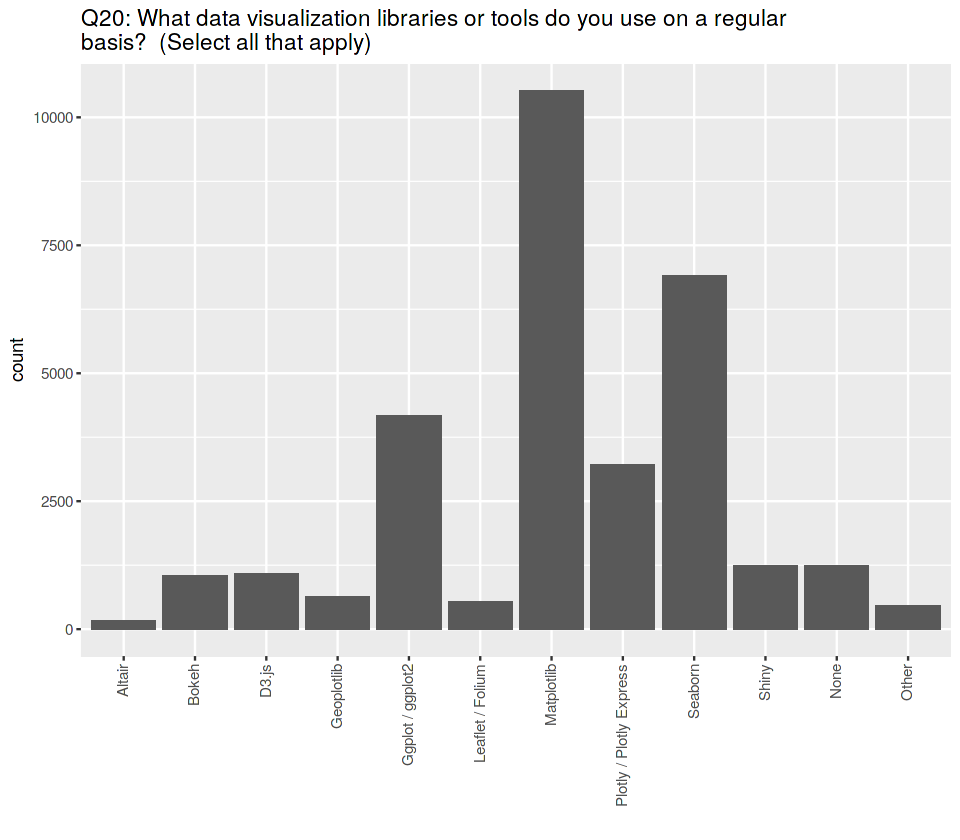

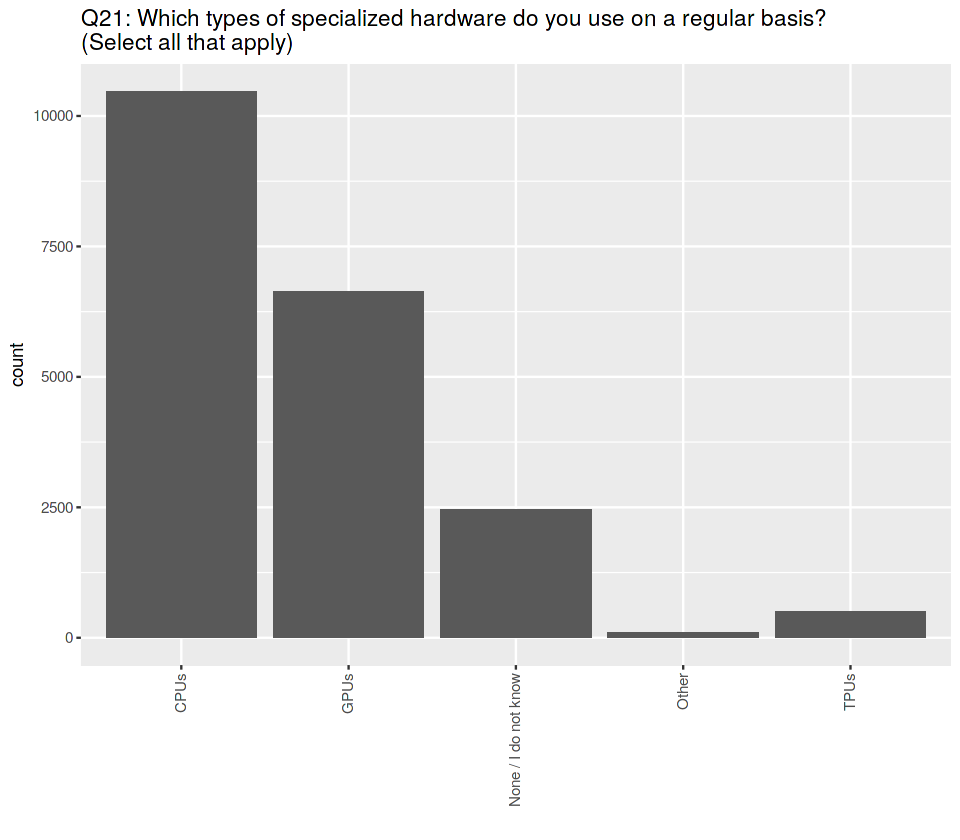

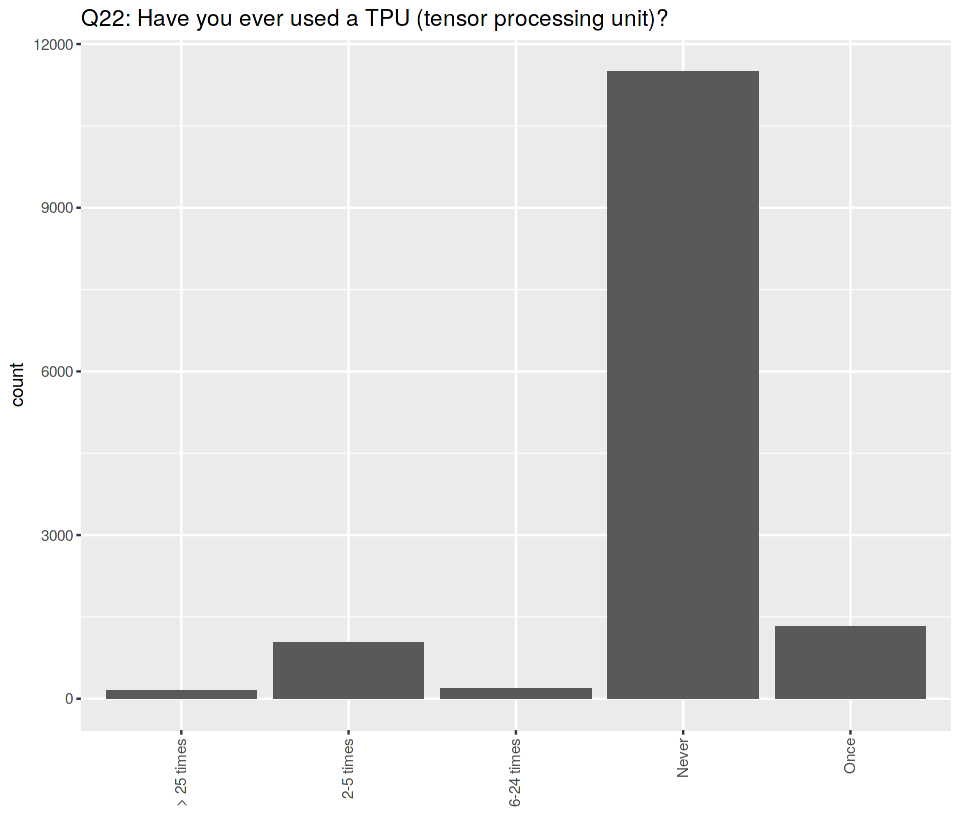

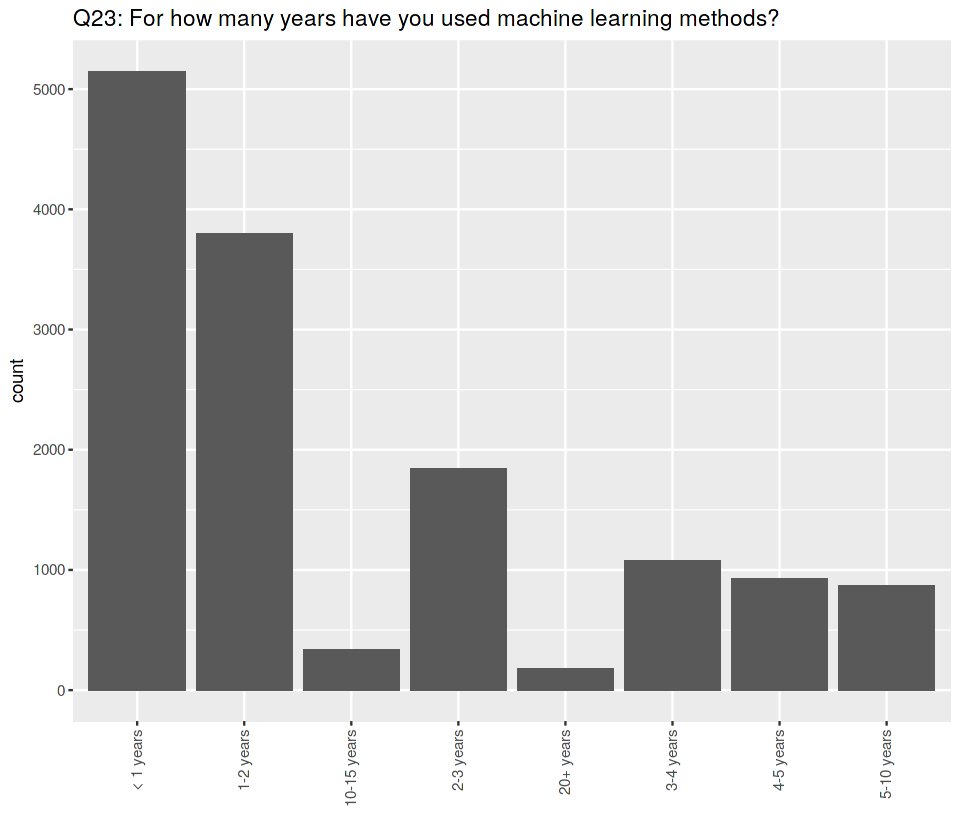

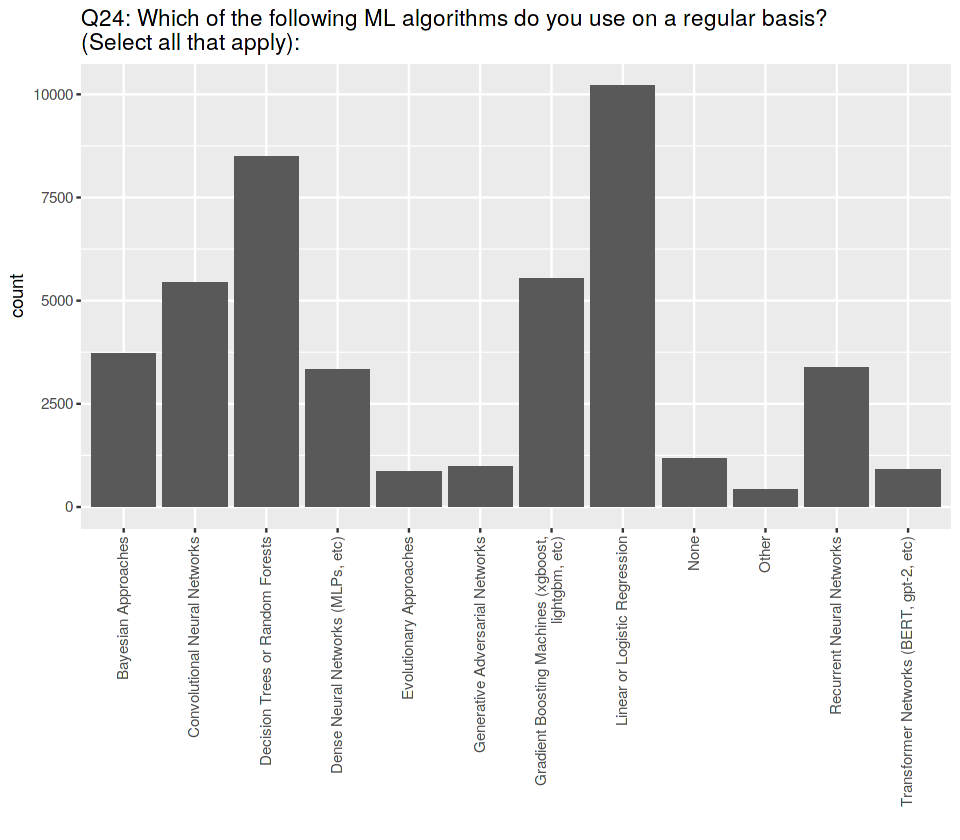

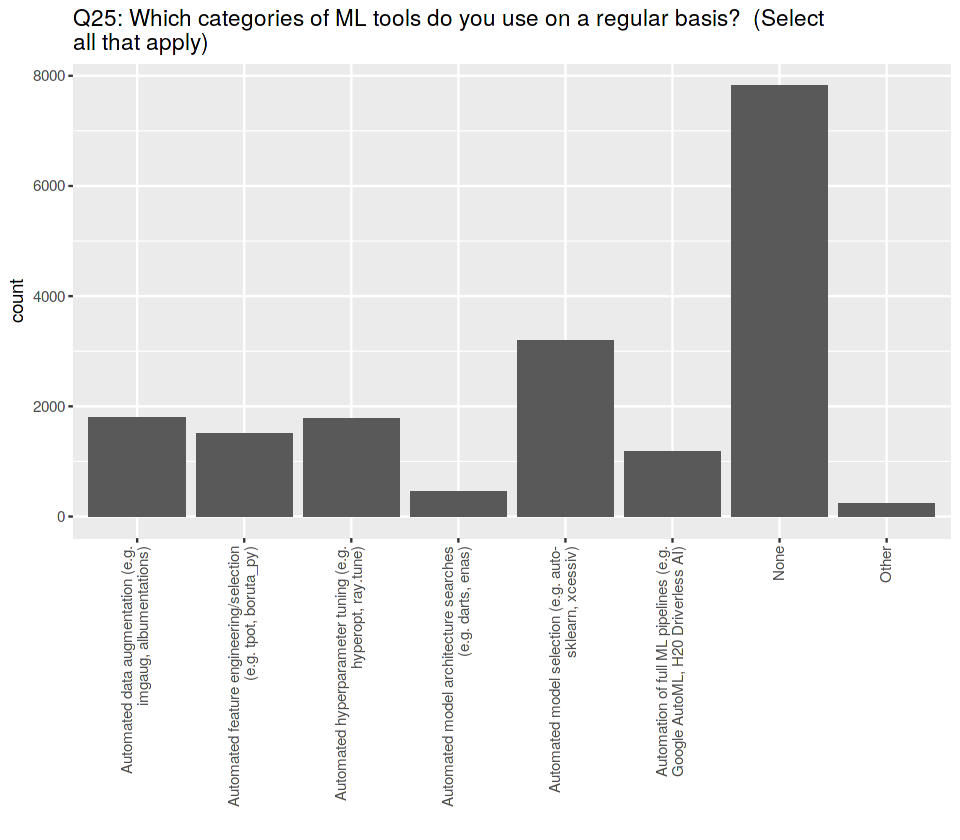

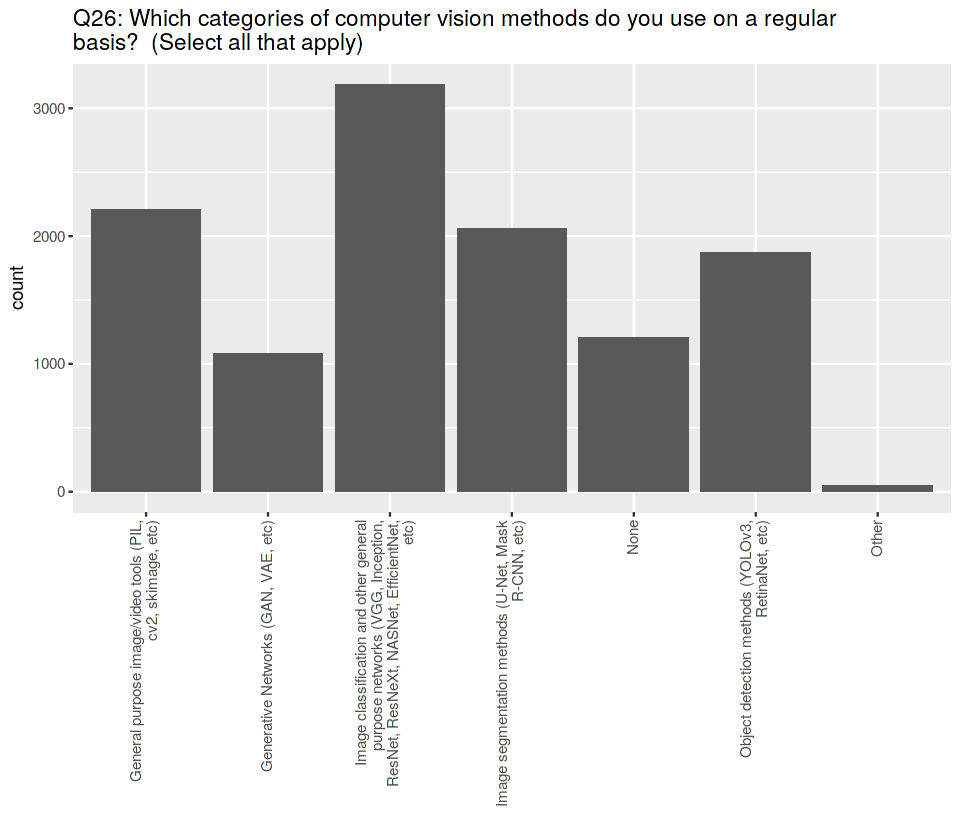

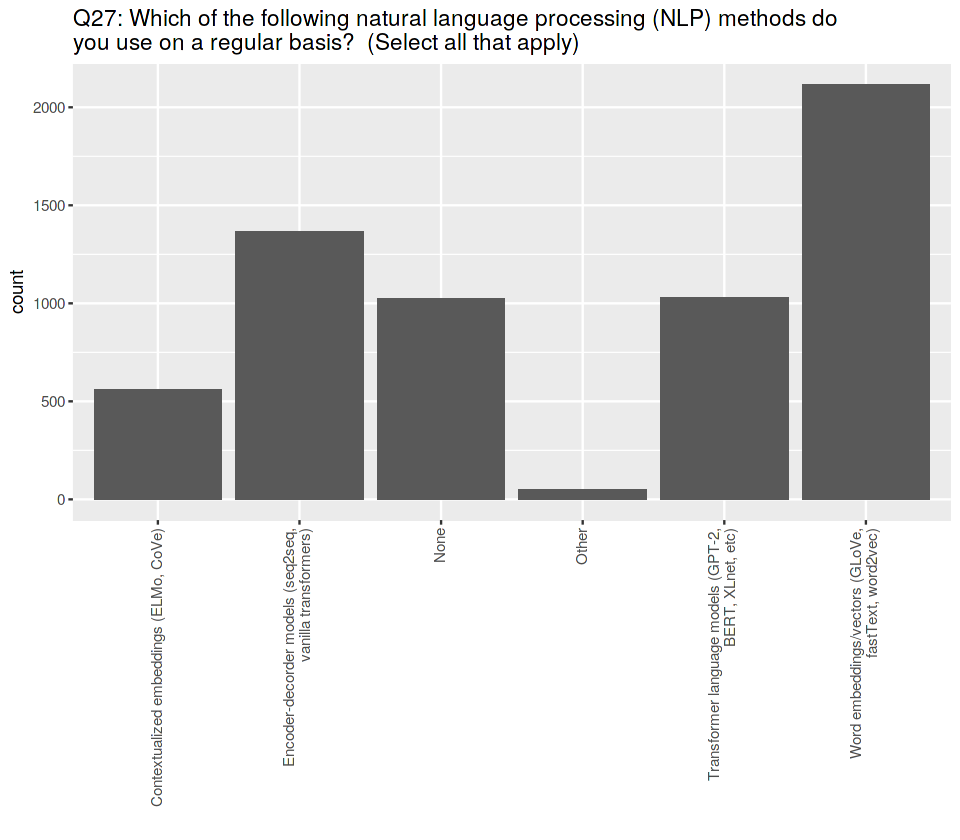

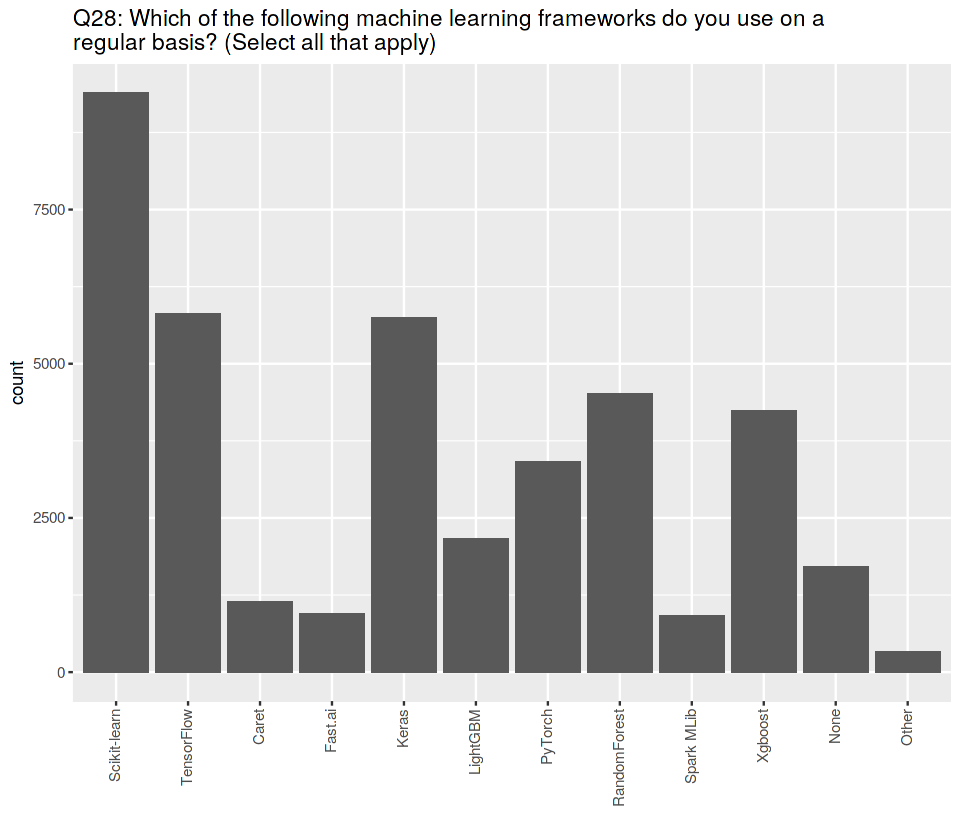

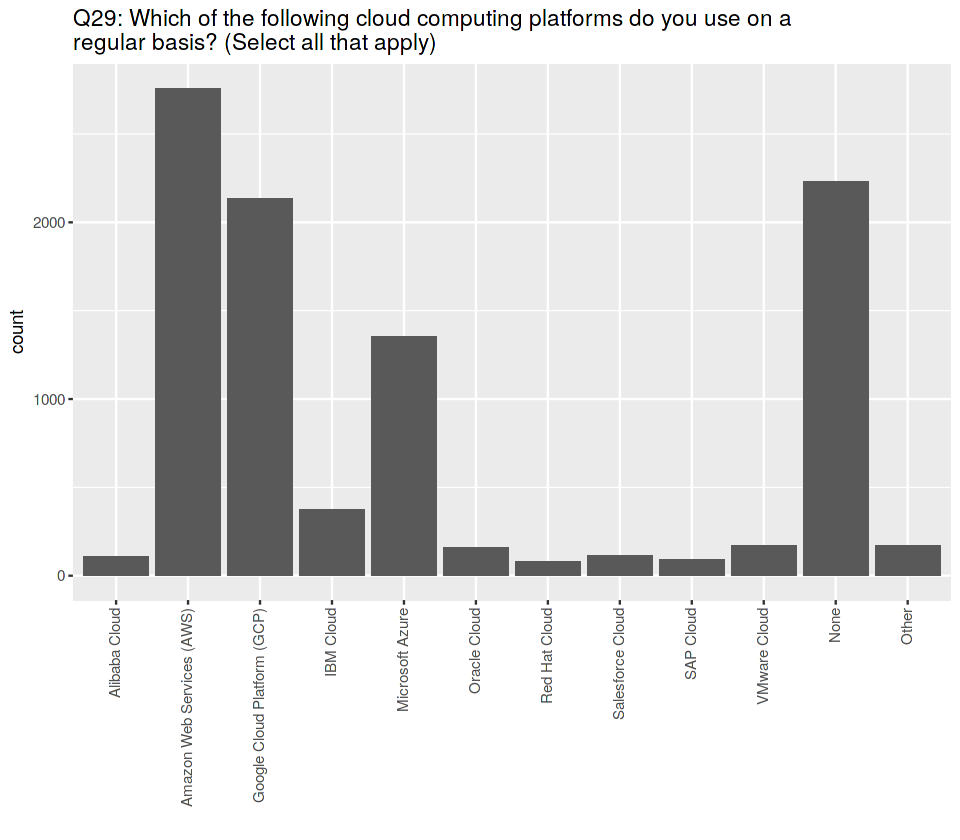

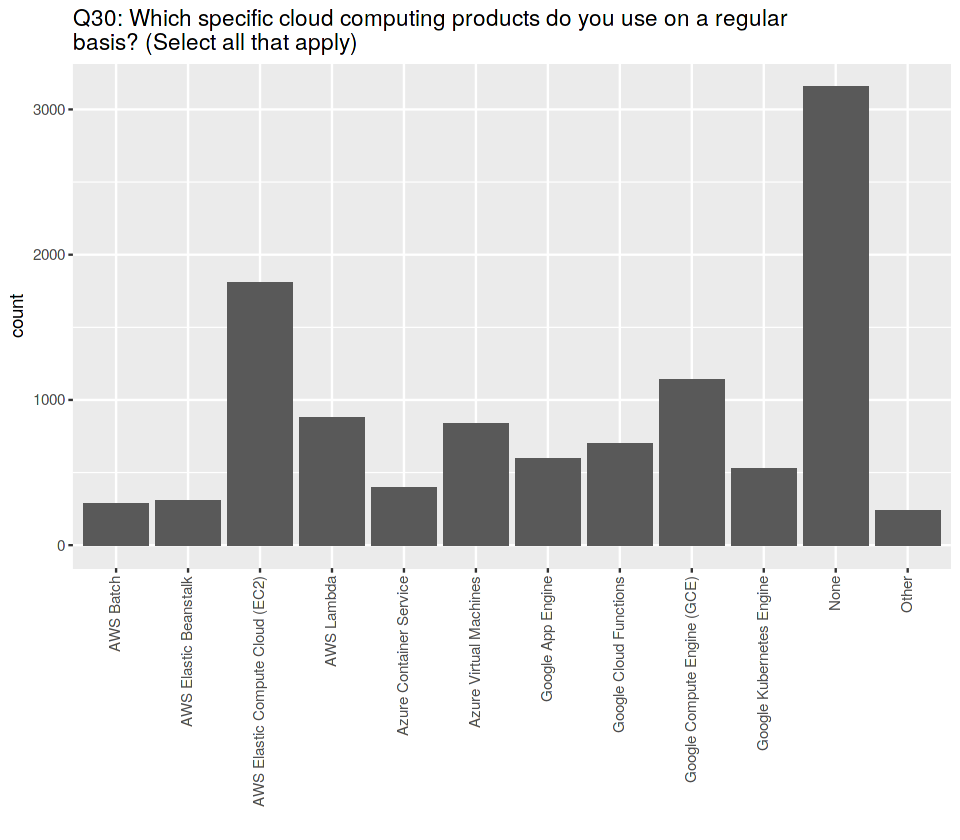

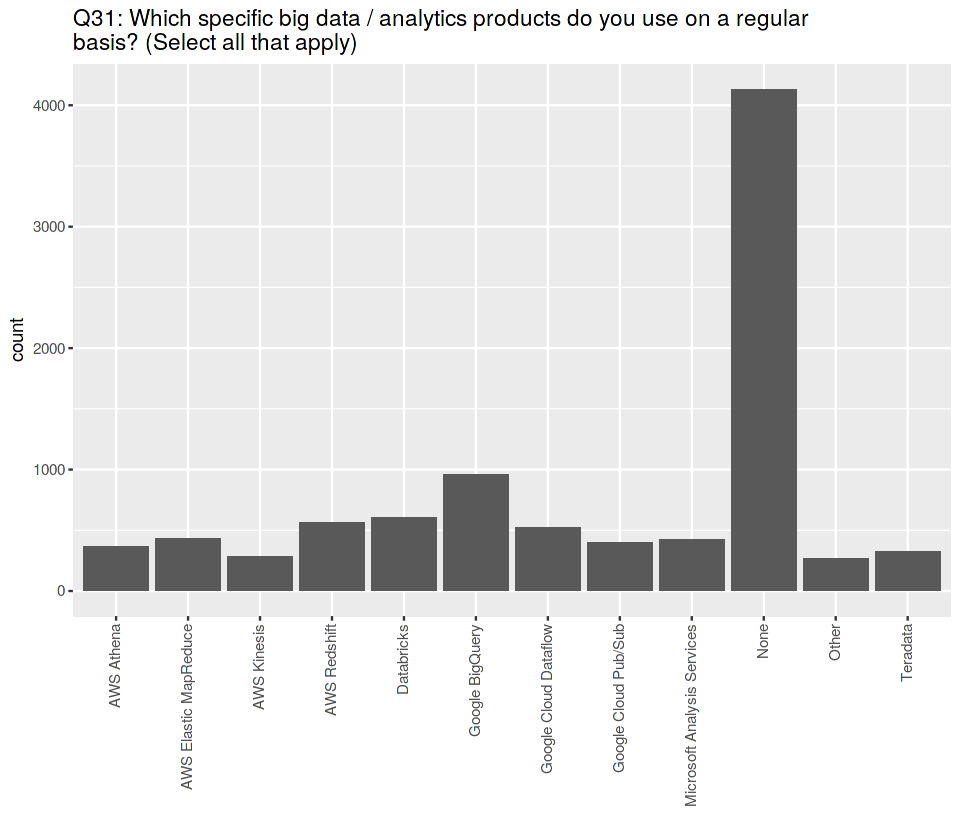

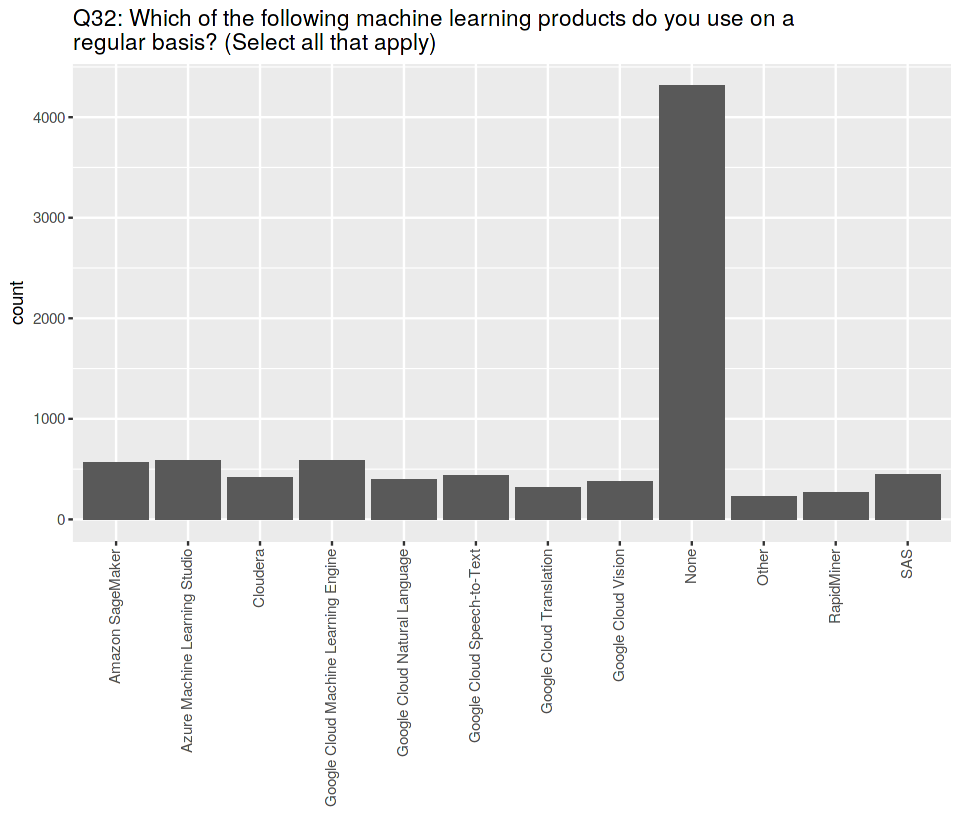

ERROR: Error in eval(e, x, parent.frame()): object 'value' not found


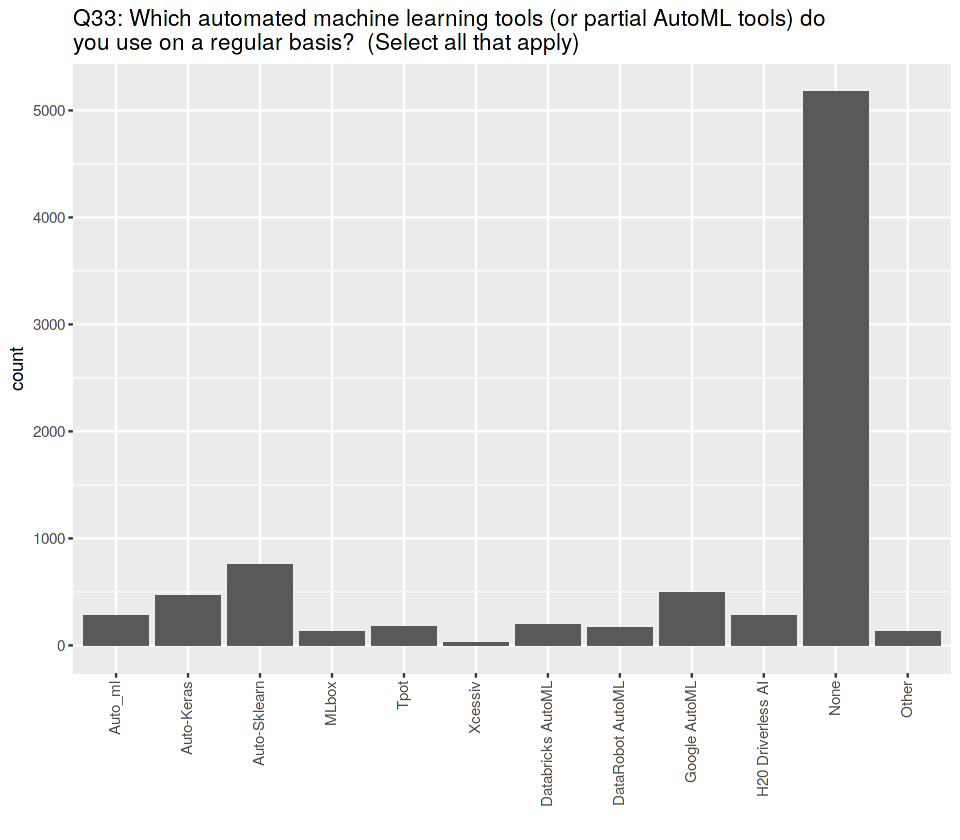

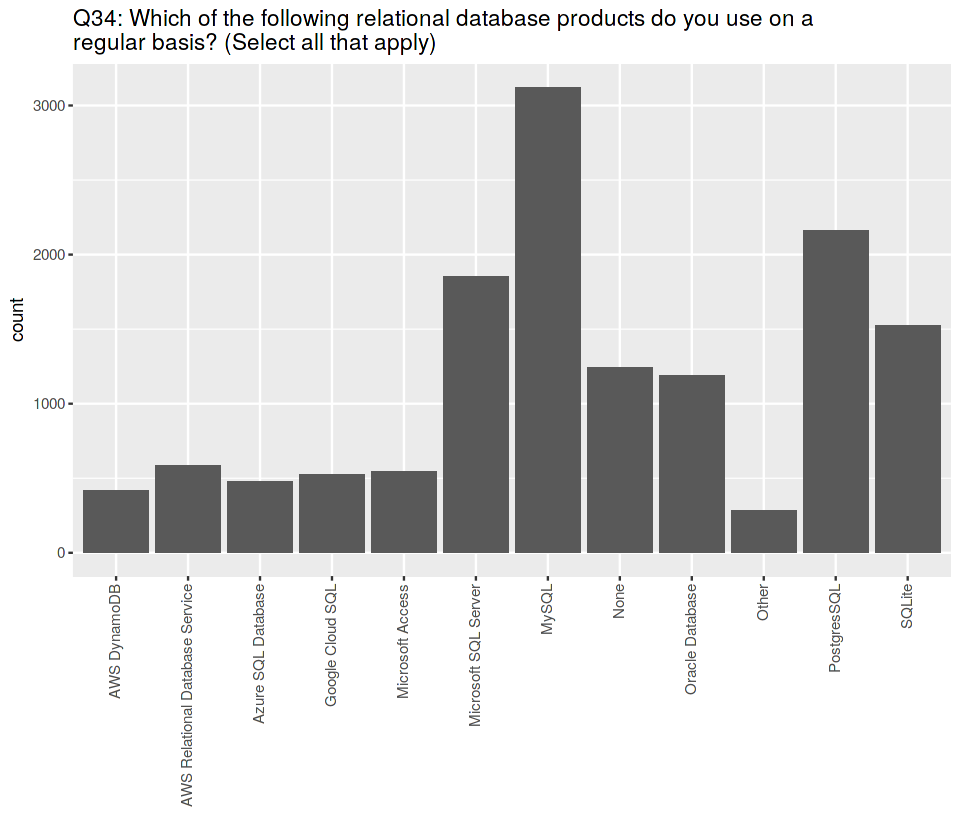

In [1]:
library(tidyverse)
options(repr.plot.width = 8)
options(warn=-1)
df_mcq_questions <- read.csv(file='../input/kaggle-survey-2019/multiple_choice_responses.csv',header=TRUE,nrow = 1) 
df_mcq <- read.csv(file='../input/kaggle-survey-2019/multiple_choice_responses.csv',skip=2,header=FALSE) 
colnames(df_mcq) <- colnames(df_mcq_questions) 
for(qnum in (1:50)){ 
    cols2plot <- colnames(df_mcq)[(grepl(paste0('Q',qnum,'$|Q',qnum,'_'),colnames(df_mcq))) & 
                                  (!grepl('TEXT$',colnames(df_mcq)))] 
    df2plot <- subset(gather(df_mcq[cols2plot]),value != '') 
    p <- ggplot(df2plot,aes(x=value)) + geom_histogram(stat="count") +  
            theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.4)) + 
            scale_x_discrete(labels = function(x) str_wrap(x, width = 40)) + 
            labs(title = paste(strwrap(paste0(gsub('_Part.*','',cols2plot[1]),": ", 
                gsub(' - Selected Choice.*','', df_mcq_questions[cols2plot[1]][[1]])),75), collapse = '\n'), x = '') 
    print(p)}

This notebook was adapted from work that was originally authored by [@seshadrikolluri](https://www.kaggle.com/seshadrikolluri/kaggle-survey-all-histograms-in-10-lines-of-code).  We especially liked this work because @seshadrikolluri was able to produce a plot for every question using less than 15 lines of code.  Here we have adapted that work to apply to the 2019 Kaggle Survey dataset instead of the 2018 Kaggle Survey dataset.  https://www.kaggle.com/seshadrikolluri/kaggle-survey-all-histograms-in-10-lines-of-code